# Breast Cancer detection with LeNet5

# Import Libraries nd Tools

In [279]:
import json
import math
import os
import cv2
from PIL import Image
import numpy as np
import keras
from keras import layers
from keras.callbacks import Callback, ModelCheckpoint, ReduceLROnPlateau, TensorBoard
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import cohen_kappa_score, accuracy_score
from tqdm import tqdm
import tensorflow as tf
from keras import backend as K
from sklearn import metrics
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.optimizers import Adam
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D, ZeroPadding2D
from keras.layers.normalization import BatchNormalization
from keras.regularizers import l2
from keras.optimizers import Adam

# Loading the Dataset (Images)

In [280]:
def Dataset_loader(DIR, RESIZE, sigmaX=10):
    IMG = []
    read = lambda imname: np.asarray(Image.open(imname).convert("RGB"))
    for IMAGE_NAME in tqdm(os.listdir(DIR)):
        PATH = os.path.join(DIR,IMAGE_NAME)
        _, ftype = os.path.splitext(PATH)
        if ftype == ".png":
            img = read(PATH)
           
            img = cv2.resize(img, (RESIZE,RESIZE))
           
            IMG.append(np.array(img))
    return IMG

benign_train = np.array(Dataset_loader('E:/Breast Cancer_train/Bening',32))
malign_train = np.array(Dataset_loader('E:/Breast Cancer_train/Malignant',32))
benign_test = np.array(Dataset_loader('E:/Breast Cancer_Test/Bening',32))
malign_test = np.array(Dataset_loader('E:/Breast Cancer_Test/Malignant',32))

100%|██████████████████████████████████████████████████████████████████████████████████| 92/92 [00:01<00:00, 87.89it/s]


# Dataset Processing

In [276]:
# Dataset shuffling and converting into categorical format

benign_train_label = np.zeros(len(benign_train))
malign_train_label = np.ones(len(malign_train))
benign_test_label = np.zeros(len(benign_test))
malign_test_label = np.ones(len(malign_test))

X_train = np.concatenate((benign_train, malign_train), axis = 0)
Y_train = np.concatenate((benign_train_label, malign_train_label), axis = 0)
X_test = np.concatenate((benign_test, malign_test), axis = 0)
Y_test = np.concatenate((benign_test_label, malign_test_label), axis = 0)

s = np.arange(X_train.shape[0])
np.random.shuffle(s)
X_train = X_train[s]
Y_train = Y_train[s]

s = np.arange(X_test.shape[0])
np.random.shuffle(s)
X_test = X_test[s]
Y_test = Y_test[s]

Y_train = to_categorical(Y_train, num_classes= 2)
Y_test = to_categorical(Y_test, num_classes= 2)

# Dataset Spliting

In [281]:
x_train, x_val, y_train, y_val = train_test_split(
    X_train, Y_train, 
    test_size=0.2, 
    random_state=11
)



# Data Visualization

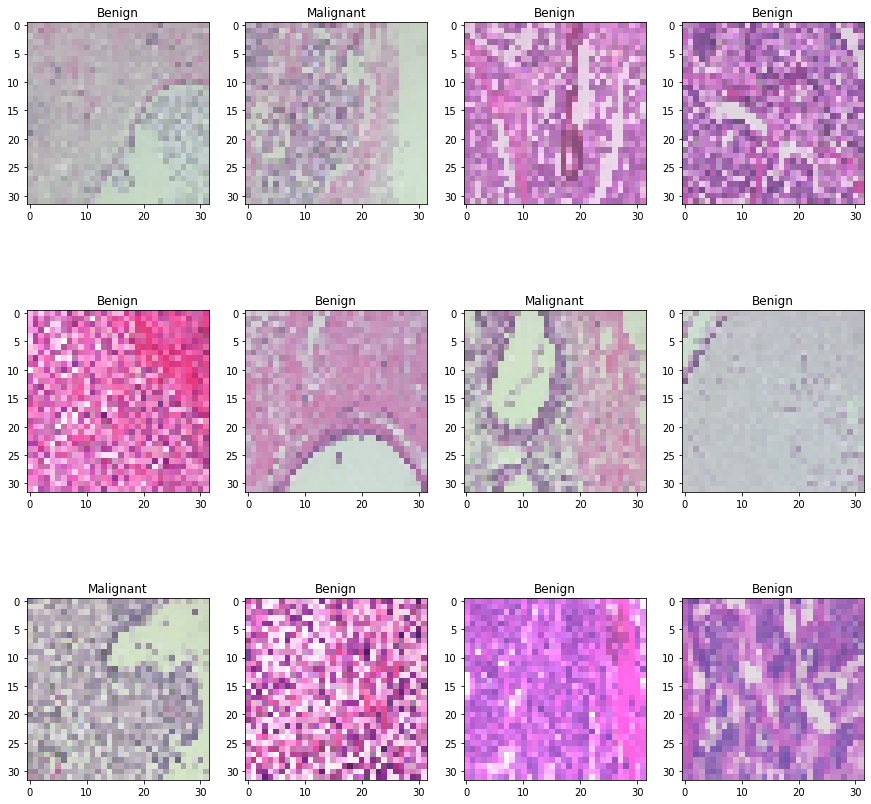

In [283]:
fig=plt.figure(figsize=(15, 15))
columns = 4
rows = 3

for i in range(1, columns*rows +1):
    ax = fig.add_subplot(rows, columns, i)
    if np.argmax(Y_train[i]) == 0:
        ax.title.set_text('Benign')
    else:
        ax.title.set_text('Malignant')
    plt.imshow(x_train[i], interpolation='nearest')
plt.show()

# LeNet5 Architecture

In [252]:
def LeNet_Model():
    model = Sequential()
    #Layer 1
    #Conv Layer 1
    model.add(Conv2D(filters = 6, 
                 kernel_size = 5, 
                 strides = 1, 
                 activation = 'relu', 
                 input_shape = (32,32,3)))
    #Pooling layer 1
    model.add(MaxPooling2D(pool_size = 2, strides = 2))
    #Layer 2
    #Conv Layer 2
    model.add(Conv2D(filters = 16, 
                 kernel_size = 5,
                 strides = 1,
                 activation = 'relu',
                 input_shape = (14,14,6)))
    #Pooling Layer 2
    model.add(MaxPooling2D(pool_size = 2, strides = 2))
    #Flatten
    model.add(Flatten())
    #Layer 3
    #Fully connected layer 1
    model.add(Dense(units = 120, activation = 'relu'))
    #Layer 4
    #Fully connected layer 2
    model.add(Dense(units = 84, activation = 'relu'))
    #Layer 5
    #Output Layer
    model.add(Dense(units = 2, activation = 'sigmoid'))
    return model

In [253]:
LeNet = LeNet_Model()
#Adam = Adam (lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0, amsgrad=False)
LeNet.compile(optimizer = 'adam', 
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])

# Model Training 

In [254]:
history = LeNet.fit(x_train, y_train, batch_size=64, epochs=20, 
                 validation_data = (x_val, y_val))

Train on 1461 samples, validate on 366 samples
Epoch 1/20
1461/1461 [==============================] - 2s 2ms/step - loss: 5.3216 - acc: 0.5996 - val_loss: 3.7200 - val_acc: 0.7199
Epoch 2/20
1461/1461 [==============================] - 0s 323us/step - loss: 1.2864 - acc: 0.6954 - val_loss: 0.5951 - val_acc: 0.8224
Epoch 3/20
1461/1461 [==============================] - 0s 312us/step - loss: 0.5720 - acc: 0.7971 - val_loss: 0.5046 - val_acc: 0.8156
Epoch 4/20
1461/1461 [==============================] - 0s 311us/step - loss: 0.5044 - acc: 0.8196 - val_loss: 0.4361 - val_acc: 0.8607
Epoch 5/20
1461/1461 [==============================] - 1s 346us/step - loss: 0.4000 - acc: 0.8662 - val_loss: 0.3442 - val_acc: 0.8825
Epoch 6/20
1461/1461 [==============================] - 0s 320us/step - loss: 0.2832 - acc: 0.9097 - val_loss: 0.3464 - val_acc: 0.8880
Epoch 7/20
1461/1461 [==============================] - 0s 309us/step - loss: 0.2435 - acc: 0.9158 - val_loss: 0.3097 - val_acc: 0.9071
Epo

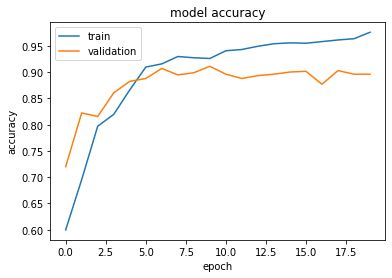

In [255]:
# Plotting Accuracy
import matplotlib.pyplot as plt

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

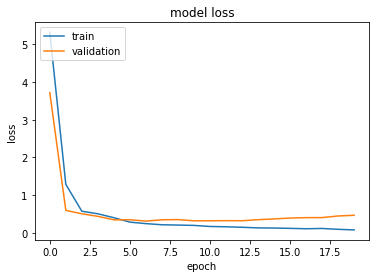

In [257]:
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

# Model Evaluation

In [273]:
preds = LeNet.evaluate(X_test, Y_test)
print ("Loss = " + str(preds[0]))
print ("Test Accuracy = " + str(preds[1]))

199/199 [==============================] - 0s 232us/step
Loss = 0.3774729553404166
Test Accuracy = 0.8919597989949749


# Confusion Matrix

In [317]:
Y_val_pred = LeNet.predict(x_val)

In [318]:
Y_pred = LeNet.predict(X_test)

In [319]:
tta_steps = 10
predictions = []

for i in tqdm(range(tta_steps)):
    preds = LeNet.predict_generator(train_generator.flow(X_test, batch_size=BATCH_SIZE, shuffle=False),
                                    steps = len(X_test)/BATCH_SIZE)
    
    predictions.append(preds)
    gc.collect()
    
Y_pred_tta = np.mean(predictions, axis=0)

100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:03<00:00,  2.69it/s]


In [320]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(np.argmax(Y_test, axis=1), np.argmax(Y_pred, axis=1))

In [315]:
print(cm)

[[104   3]
 [ 18  74]]


# Classifiction Report

In [323]:
clfreport = classification_report(np.argmax(Y_test, axis=1), np.argmax(Y_pred, axis=1))
print("Classification Report")
print(clfreport)   

Classification Report
              precision    recall  f1-score   support

           0       0.85      0.97      0.91       107
           1       0.96      0.80      0.88        92

    accuracy                           0.89       199
   macro avg       0.91      0.89      0.89       199
weighted avg       0.90      0.89      0.89       199

